# 05 Сравнение алгоритмов

Теперь, когда мы реализовали три разных алгоритма решения многорукого бандита, стоит сравнить их на одной задаче.

Для этого набора сравнений мы решили сосредоточиться на отжиге версий epsilon-Greedy и Softmax наряду с UCB1. Использование отжиговых версий алгоритмов epsilon-Greedy и Softmax позволяет упростить сравнение с UCB1 за счет удаления параметров, которые необходимо настраивать, чтобы алгоритмы epsilon-Greedy и Softmax работали наилучшим образом.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('epsilon_greedy_annealing_results.tsv', sep='\t', header=None)
df1.columns = ['sim_nums', 'times', 'chosen_arms', 'rewards', 'cumulative_rewards']

In [3]:
df2 = pd.read_csv('annealing_softmax_results.tsv', sep='\t', header=None)
df2.columns = ['sim_nums', 'times', 'chosen_arms', 'rewards', 'cumulative_rewards']

In [4]:
df3 = pd.read_csv('ucb1_results.tsv', sep='\t', header=None)
df3.columns = ['sim_nums', 'times', 'chosen_arms', 'rewards', 'cumulative_rewards']

На рисунках вы можете увидеть результаты трех стандартных типов анализа для этого набора сравнительных тестов.

## Подход 1: отслеживание вероятности выбора лучшей руки

In [5]:
best_arm = 1

In [6]:
kk1 = df1[(df1['chosen_arms']==best_arm)].groupby(['times', 'chosen_arms']).size().reset_index()
kk1.columns = ['times', 'chosen_arms', 'count']
kk1['proba'] = kk1['count']/5000

In [7]:
kk2 = df2[(df2['chosen_arms']==best_arm)].groupby(['times', 'chosen_arms']).size().reset_index()
kk2.columns = ['times', 'chosen_arms', 'count']
kk2['proba'] = kk2['count']/5000

In [8]:
kk3 = df3[(df3['chosen_arms']==best_arm)].groupby(['times', 'chosen_arms']).size().reset_index()
kk3.columns = ['times', 'chosen_arms', 'count']
kk3['proba'] = kk3['count']/5000

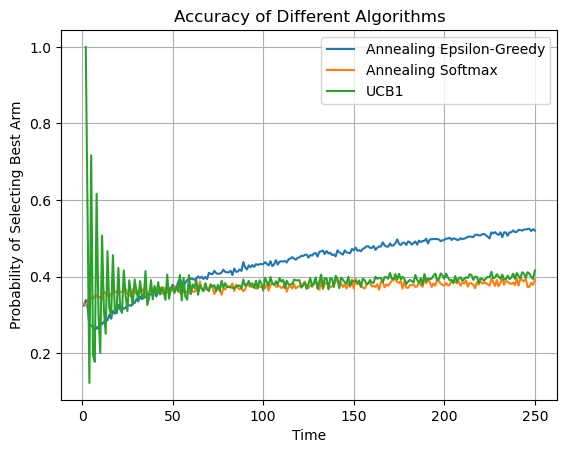

In [9]:
plt.plot(kk1['times'], kk1['proba'], label='Annealing Epsilon-Greedy')
plt.plot(kk2['times'], kk2['proba'], label='Annealing Softmax')
plt.plot(kk3['times'], kk3['proba'], label='UCB1')

plt.xlabel('Time')
plt.ylabel('Probability of Selecting Best Arm')
plt.title('Accuracy of Different Algorithms')
plt.legend()
plt.grid()
plt.show()

На рисунке мы построили график вероятности выбора лучшей руки в каждой игре тремя алгоритмами, которые мы использовали до сих пор. Глядя на это изображение, можно заметить несколько вещей, которые бросаются в глаза:
- Мы очень хорошо видим, насколько более шумным выглядит поведение UCB1 по сравнению с алгоритмами epsilon-Greedy или Softmax.
- Мы видим, что алгоритм epsilon-Greedy сходится не так быстро, как алгоритм Softmax. Это может говорить о том, что нам нужно использовать другой отжиг или что в данном тесте алгоритм Softmax просто превосходит алгоритм epsilon-Greedy.
- Мы видим, что UCB1 требуется некоторое время, чтобы догнать алгоритм Softmax с отжигом, но он начинает догонять его ближе к концу.
- UCB1 очень быстро находит лучшую руку, но из-за того, что он делает обратный ход, он отстает от алгоритма Softmax по большинству показателей.

## Подход 2: отслеживание среднего вознаграждения в каждый момент времени

In [10]:
kk1 = df1.groupby(['times']).mean().reset_index()

kk2 = df2.groupby(['times']).mean().reset_index()

kk3 = df3.groupby(['times']).mean().reset_index()

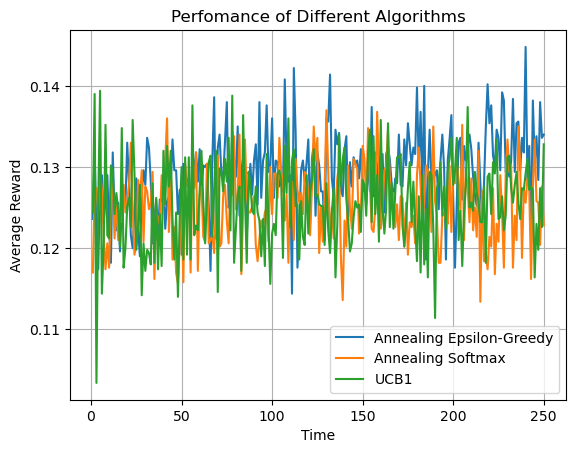

In [11]:
plt.plot(kk1['times'], kk1['rewards'], label='Annealing Epsilon-Greedy')
plt.plot(kk2['times'], kk2['rewards'], label='Annealing Softmax')
plt.plot(kk3['times'], kk3['rewards'], label='UCB1')

plt.xlabel('Time')
plt.ylabel('Average Reward')
plt.title('Perfomance of Different Algorithms')
plt.legend()
plt.grid()
plt.show()

## Подход 3: отслеживание совокупного вознаграждения в каждый момент времени

In [12]:
kk1 = df1.groupby(['times']).mean().reset_index()

kk2 = df2.groupby(['times']).mean().reset_index()

kk3 = df3.groupby(['times']).mean().reset_index()

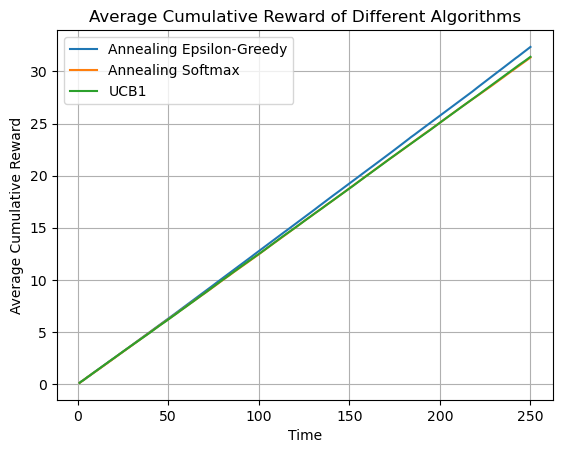

In [13]:
plt.plot(kk1['times'], kk1['cumulative_rewards'], label='Annealing Epsilon-Greedy')
plt.plot(kk2['times'], kk2['cumulative_rewards'], label='Annealing Softmax')
plt.plot(kk3['times'], kk3['cumulative_rewards'], label='UCB1')

plt.xlabel('Time')
plt.ylabel('Average Cumulative Reward')
plt.title('Average Cumulative Reward of Different Algorithms')
plt.legend()
plt.grid()
plt.show()

# Упражнения

UCB1 - очень мощный алгоритм. В сравнении, которое мы вам только что показали, он не превзошел алгоритмы epsilon-Greedy и Softmax. Мы хотели бы, чтобы вы попробовали другие симуляции, которые дадут вам больше понимания того, в каких случаях UCB1 будет работать лучше.

- Мы уже отмечали, что алгоритмы epsilon-Greedy и Softmax ведут себя по-разному, если руки в вашей задаче о бандите сильно отличаются друг от друга. Как сходство между руками влияет на поведение UCB1?
- Наши графики показали, что UCB1 мог бы обогнать алгоритм Softmax, если бы алгоритм выполнял не 250, а 500 испытаний. Исследуйте это.
- Будет ли алгоритм UCB1 работать лучше или хуже, если у него будет больше рук? Если предположить, что горизонт составляет 250 испытаний, то каковы его результаты по сравнению с другими алгоритмами при наличии 20 рук? При наличии 100 рук? При наличии 500 рук? Как это зависит от горизонта?